# Projectile Motion Assignment: Due Wednesday 9/7

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$x' = V_x$

$y' = V_y$

$V_x' = 0$

$V_y' = -g$

Code the equations into a function 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [2]:
def proj_vac(t,y):
    
    g = 9.81
    
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = 0
    dvy_dt = -g
    
    return np.array([dx_dt,dy_dt,dvx_dt,dvy_dt])

In [3]:
v0 = 300 
theta = 50*np.pi/180
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

x0 = 0
y0 = 0
r0 = [x0,y0,vx0,vy0]

t0 = 0
tf = 50
n=1000
t1 = np.linspace(t0,tf,n)

In [4]:
def hits_ground(t,y):
    return y[1]

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [5]:
sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),r0,t_eval=t1, events=hits_ground)
sol_RK45.y[0];
xta = sol_RK45.y[0]
yta = sol_RK45.y[1];

In [6]:
t02 = 0
tf2 = 3.5
n = 1000
t2 = np.linspace(t02,tf2,n)
sol2_RK45 = integrate.solve_ivp(proj_vac,(t02,tf2),r0,t_eval=t2, events=hits_ground)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


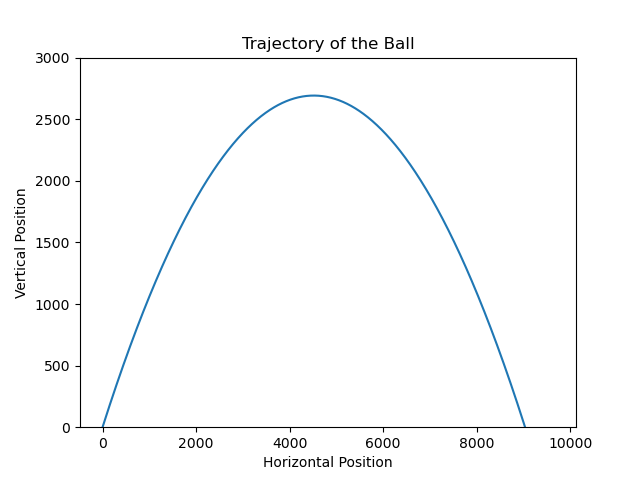

In [7]:
fig = plt.figure()
plt.plot(xta,yta)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position');
plt.title('Trajectory of the Ball')
plt.ylim([0,3000]);

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [8]:
def rungekutta_4(f,t,y0):
    n = len(t)
    y = np.zeros( ( n, len(y0)) )
    y[0] = y0
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i],y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 + k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 + k2)
        k4 = f(t[i] + dt, y[i] + dt*k3)
        
        y[i+1] = y[i] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
        
    return y

In [9]:
sol_rk4 = rungekutta_4(proj_vac,t1,r0);

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$x' = V_x$

$y' = V_y$

$V_x' = -\frac{c}{m} V V_x$

$V_y' = -g - \frac{c}{m} V V_y$

Code the equations into a function

In [10]:
def proj_air(t,y):
    
    g = 9.81
    gamma = 0.25
    D = 0.15
    lamb = 10000
    density = 7800
    volume = (4/3)*np.pi*((0.15/2)**3)
    m = density * volume
    c = gamma * (D)**2
    v = np.sqrt(y[2]**2 + y[3]**2)
    
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = -c/m * v * y[2]
    dvy_dt = (-g - ((c/m)*v*y[3]))
    
    return np.array([dx_dt,dy_dt,dvx_dt,dvy_dt])       

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [11]:
sol3_RK45 = integrate.solve_ivp(proj_air,(t0,tf),r0,t_eval=t1, events=hits_ground)
xtc = sol3_RK45.y[0]
ytc = sol3_RK45.y[1];

In [12]:
sol4_RK45 = integrate.solve_ivp(proj_air,(t02,tf2),r0,t_eval=t2, events=hits_ground)

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


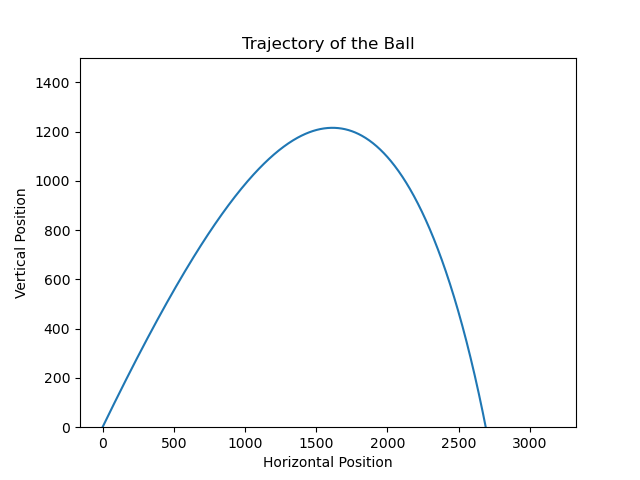

In [13]:
fig = plt.figure()
plt.plot(xtc,ytc)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Trajectory of the Ball')
plt.ylim([0,1500]);

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$x' = V_x$

$y' = V_y$

$V_x' = -\frac{\gamma D^{2}\exp(\frac{-y}{\lambda})}{m}VV_x$

$V_y' = -g - \frac{\gamma D^{2}\exp(\frac{-y}{\lambda})}{m}VV_x$

Code the equations into a function

In [14]:
def proj_drag(t,y):
    

    g = 9.81
    gamma = 0.25
    D = 0.15
    lamb = 10000
    density = 7800
    volume = (4/3)*np.pi*((0.15/2)**3)
    m = density * volume
    v = np.sqrt(y[2]**2 + y[3]**2)
    
    dx_dt = y[2]
    dy_dt = y[3]
    dvx_dt = -((gamma * D**2 * math.e**(-y/lamb))/m)* v * y[2]
    dvy_dt = (-g - (((gamma * D**2 * math.e**(-y/lamb))/m)*v*y[3]))
 
    return np.array([dx_dt,dy_dt,dvx_dt,dvy_dt])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

Plot the ball's trajectory and find it's horizontal range

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

Your results should look like the plot below.

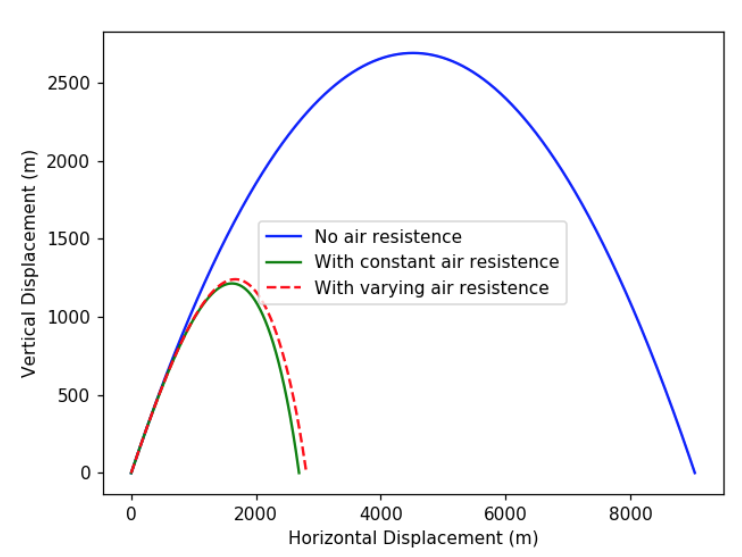

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

Turning on the air resistance with c(0) impacts the motion much more dramatically than turning on the variation with atmosphere.